<a href="https://colab.research.google.com/github/Bart8109/SDS-CP035-gluco-track/blob/main/EDA_for_cdc_diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Packages for Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

Import Libraries from UCI Github for data


In [2]:
!pip3 install -U ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [5]:
display(X.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


# Task
Explain the error in the selected code, fix it if possible, and incorporate the changes into the existing code. If not, diagnose the error.

## Combine data

### Subtask:
Combine the features (`X`) and the target (`y`) DataFrames into a single DataFrame.


**Reasoning**:
Concatenate the features and target dataframes into a single dataframe.



In [6]:
df = pd.concat([X, y], axis=1)
display(df.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


## Exploratory data analysis (eda)

### Subtask:
Perform basic EDA on the combined DataFrame, including checking for missing values, examining data types, and visualizing distributions.


**Reasoning**:
Perform basic EDA by checking for missing values, examining data types, and generating descriptive statistics.



In [7]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Display data types
print("\nData types:")
df.info()

# Generate descriptive statistics
print("\nDescriptive statistics:")
display(df.describe())

Missing values per column:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI      

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


**Reasoning**:
Visualize the distributions of a few representative numerical features using histograms.



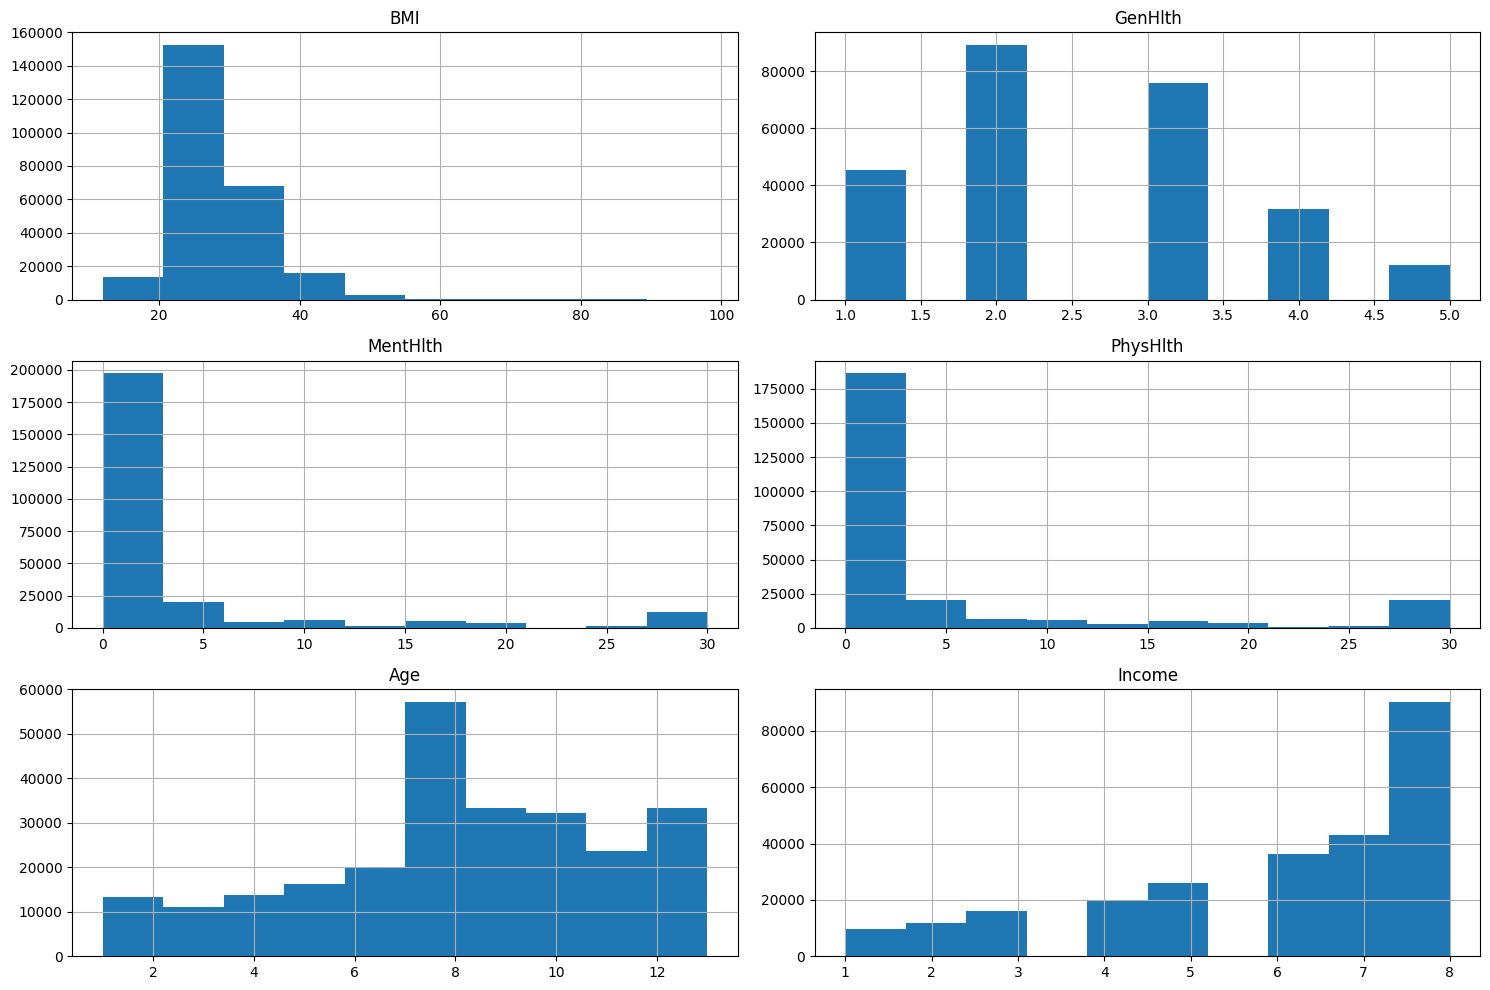

In [8]:
import matplotlib.pyplot as plt

# Select a few numerical columns for visualization
numerical_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']

# Create histograms for the selected columns
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

## Data preprocessing

### Subtask:
Preprocess the data by handling any missing values, encoding categorical variables if necessary, and scaling numerical features.


**Reasoning**:
Based on the variable information and EDA, all features are already numerically encoded. The next step is to scale the numerical features that would benefit from it. I will use StandardScaler for this purpose and replace the original columns with the scaled ones.



In [9]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols_to_scale = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaler to the selected numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

# Display the first few rows of the scaled DataFrame
display(df.head())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,1.757936,1,0,0,0,0,1,...,0,2.329121,1.998592,1.233999,1,0,0.316900,4,-1.474487,0
1,0,0,0,-0.511806,1,0,0,1,0,0,...,1,0.457294,-0.429630,-0.486592,0,0,-0.337933,6,-2.440138,0
2,1,1,1,-0.057858,0,0,0,0,1,0,...,1,2.329121,3.617407,2.954590,1,0,0.316900,4,0.939638,0
3,1,0,1,-0.209174,0,0,0,1,1,1,...,0,-0.478619,-0.429630,-0.486592,0,0,0.971733,3,-0.026012,0
4,1,1,1,-0.663122,0,0,0,1,1,1,...,0,-0.478619,-0.024926,-0.486592,0,0,0.971733,5,-0.991662,0


## Summary:

### Data Analysis Key Findings

*   The features (`X`) and target (`y`) DataFrames were successfully combined into a single DataFrame `df` using `pd.concat`.
*   Initial EDA revealed no missing values and all features were of `int64` data type.
*   Descriptive statistics provided a summary of the distribution for each column.
*   Histograms were generated for selected numerical columns ('BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income') to visualize their distributions.
*   Numerical features ('BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Income') were successfully scaled using `StandardScaler`.

### Insights or Next Steps

*   The data is clean and requires no missing value imputation or categorical encoding based on the initial EDA.
*   The scaled data is now ready for model training and evaluation.


**Reasoning**:
Visualize the distributions of the binary features using histograms.

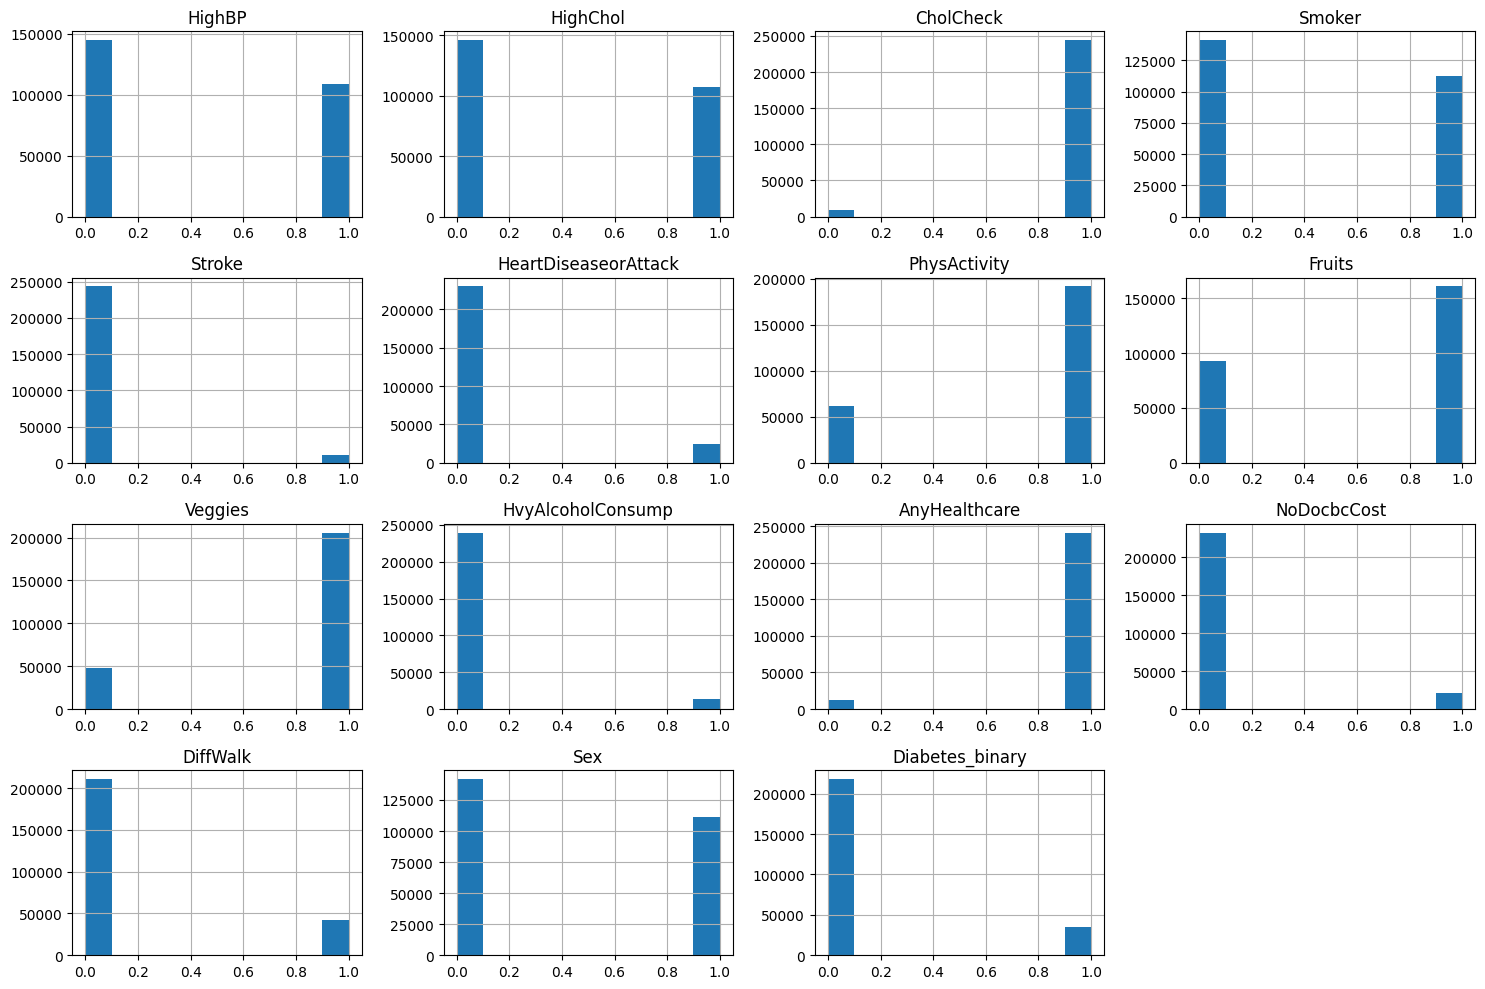

In [10]:
import matplotlib.pyplot as plt

# Identify binary columns
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

# Create histograms for the binary columns
df[binary_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

**Reasoning**:
Calculate and display the percentage of each class (0 and 1) for each binary feature.

In [11]:
# Identify binary columns again (in case the notebook state was reset or changed)
binary_cols = [col for col in df.columns if df[col].nunique() == 2]

print("Percentages for each binary class feature:")
for col in binary_cols:
    print(f"\n{col}:")
    print(df[col].value_counts(normalize=True) * 100)

Percentages for each binary class feature:

HighBP:
HighBP
0    57.09989
1    42.90011
Name: proportion, dtype: float64

HighChol:
HighChol
0    57.587906
1    42.412094
Name: proportion, dtype: float64

CholCheck:
CholCheck
1    96.26695
0     3.73305
Name: proportion, dtype: float64

Smoker:
Smoker
0    55.683144
1    44.316856
Name: proportion, dtype: float64

Stroke:
Stroke
0    95.94292
1     4.05708
Name: proportion, dtype: float64

HeartDiseaseorAttack:
HeartDiseaseorAttack
0    90.581441
1     9.418559
Name: proportion, dtype: float64

PhysActivity:
PhysActivity
1    75.654368
0    24.345632
Name: proportion, dtype: float64

Fruits:
Fruits
1    63.425576
0    36.574424
Name: proportion, dtype: float64

Veggies:
Veggies
1    81.14199
0    18.85801
Name: proportion, dtype: float64

HvyAlcoholConsump:
HvyAlcoholConsump
0    94.380322
1     5.619678
Name: proportion, dtype: float64

AnyHealthcare:
AnyHealthcare
1    95.105251
0     4.894749
Name: proportion, dtype: float64

NoDocbc

## Principal Component Analysis (PCA)

### Subtask:
Perform PCA on the scaled data to analyze component variance and assess dimensionality reduction potential.

**Reasoning**:
Apply PCA to the scaled dataframe `df`. We will first fit PCA to the data and then examine the explained variance ratio of each principal component to determine the number of components to keep.

Explained variance ratio of each principal component:
[0.2725628  0.13078444 0.11027891 0.10751114 0.07072356 0.05921056
 0.04969195 0.03153955 0.02563654 0.02488595 0.02319468 0.01829269
 0.01733941 0.01399927 0.01012487 0.00818624 0.00809785 0.00572455
 0.00456387 0.00392438 0.00372677]

Cumulative explained variance:
[0.2725628  0.40334724 0.51362615 0.6211373  0.69186086 0.75107142
 0.80076337 0.83230293 0.85793946 0.88282542 0.9060201  0.92431278
 0.9416522  0.95565147 0.96577633 0.97396257 0.98206042 0.98778497
 0.99234885 0.99627323 1.        ]


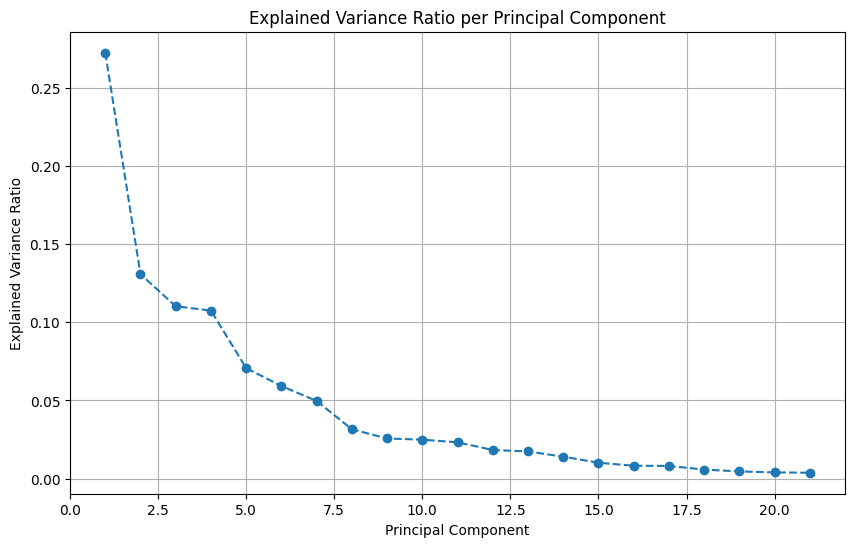

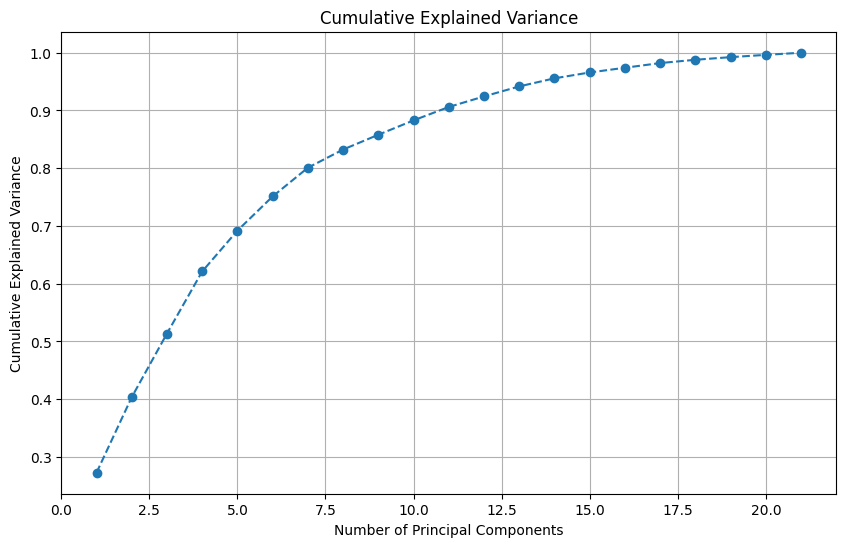

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Separate features (excluding the target variable)
X_scaled = df.drop('Diabetes_binary', axis=1)

# Initialize PCA
pca = PCA()

# Fit PCA to the scaled features
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each principal component:")
print(explained_variance_ratio)

# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("\nCumulative explained variance:")
print(cumulative_explained_variance)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio per Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

**Reasoning**:
Display the loadings of each original feature on the principal components.

In [13]:
# Get the loadings (components)
loadings = pd.DataFrame(pca.components_, columns=X_scaled.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])

# Display the loadings
display(loadings)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
PC1,0.112220,0.076354,0.004675,0.215478,0.071458,0.025669,0.050854,-0.096101,-0.042325,-0.045100,...,-0.012140,0.040264,0.508932,0.325779,0.447086,0.135985,-0.022165,0.153537,-0.346752,-0.429041
PC2,0.114784,0.085736,0.009721,-0.206894,0.046340,0.012892,0.038284,-0.010985,0.028081,-0.010133,...,0.012703,-0.039455,-0.050540,-0.505135,-0.211883,0.003883,-0.002420,0.698958,-0.303396,-0.216295
PC3,0.086498,0.101063,0.015276,-0.193922,0.009802,0.016915,0.044608,0.006957,0.061555,0.046189,...,0.044165,-0.028559,0.183084,0.123036,0.392560,0.064121,0.007243,0.497851,0.570067,0.391910
PC4,0.126045,0.073631,0.011630,0.880993,-0.020778,-0.002159,0.013331,-0.028011,-0.021573,-0.002116,...,0.015278,-0.023116,0.107765,-0.315129,-0.097713,0.022144,0.067654,0.102558,0.123887,0.219666
PC5,0.074763,0.074228,0.003741,0.202899,0.019118,-0.002984,-0.003770,0.015341,0.011633,0.003821,...,0.008379,-0.002461,-0.324711,0.702030,-0.442614,-0.034125,-0.053991,0.375609,0.031385,-0.080593
PC6,0.015290,0.035914,0.005200,-0.062630,0.090021,-0.004786,0.006273,-0.025613,-0.052093,-0.014575,...,0.015245,-0.031076,0.061380,0.153294,0.025021,-0.030658,0.124253,0.041853,-0.634316,0.730043
PC7,0.086666,0.085041,0.002010,-0.187306,0.050669,0.008959,0.037221,-0.002610,-0.073429,-0.033797,...,-0.006257,0.012119,0.721668,0.042845,-0.609511,-0.038259,0.082829,-0.101987,0.156820,0.043511
PC8,0.141951,0.197534,-0.011137,-0.047904,0.431749,0.011792,0.061521,-0.088907,-0.515659,-0.227601,...,-0.014241,0.005303,-0.191777,-0.011231,0.064514,-0.010381,0.594868,-0.055275,0.117954,-0.094845
PC9,0.090354,0.109148,0.002884,0.025236,0.502411,0.007430,0.052622,0.274709,0.662334,0.329872,...,-0.014299,0.015245,-0.009346,0.003631,0.005194,-0.025832,0.293980,-0.094154,-0.014628,-0.062091
PC10,0.452779,0.727313,0.032834,-0.085540,-0.434320,0.014342,0.045110,0.083116,0.077895,0.013846,...,0.004442,0.009872,-0.104949,-0.011142,0.042368,-0.020761,-0.007939,-0.192298,-0.049170,-0.011531
